In [6]:
import os
# Mount drive
drive.mount('/content/drive')

# Path to your dataset
drive_dataset_path = '/content/drive/MyDrive/MNSIT_digits'

# Copy dataset locally to speed up access
print("Copying dataset to local storage (this makes it much faster)...")
!cp -r "$drive_dataset_path" /content/
base_dir = '/content/MNSIT_digits'

train_dir = os.path.join(base_dir, 'trainingSet')
test_dir = os.path.join(base_dir, 'testSet')

Mounting Google Drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Copying dataset to local storage (this makes it much faster)...


In [69]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
import time

base_dir = '/content/MNSIT_digits/trainingSet'

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=64,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=64,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)

# LeNet-5
lenet = Sequential([
    Conv2D(6, (5,5), activation='relu', input_shape=(28,28,1), padding='same'),
    AveragePooling2D(pool_size=(2,2)),
    Conv2D(16, (5,5), activation='relu'),
    AveragePooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

lenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\nTraining LeNet-5...")
start = time.time()
lenet.fit(train_generator, epochs=10, validation_data=val_generator, verbose=1)
elapsed = time.time() - start

val_loss, val_acc = lenet.evaluate(val_generator, verbose=0)
print(f"\nLeNet-5 Validation Accuracy: {val_acc*100:.2f}%  |  Time: {elapsed:.2f}s")


Found 33611 images belonging to 10 classes.
Found 8398 images belonging to 10 classes.

Training LeNet-5...
Epoch 1/10
526/526 ━━━━━━━━━━━━━━━━━━━━ 38s 68ms/step - accuracy: 0.7747 - loss: 0.7175 - val_accuracy: 0.9545 - val_loss: 0.1440
Epoch 2/10
526/526 ━━━━━━━━━━━━━━━━━━━━ 32s 61ms/step - accuracy: 0.9620 - loss: 0.1227 - val_accuracy: 0.9709 - val_loss: 0.0948
Epoch 3/10
526/526 ━━━━━━━━━━━━━━━━━━━━ 32s 61ms/step - accuracy: 0.9756 - loss: 0.0809 - val_accuracy: 0.9758 - val_loss: 0.0784
Epoch 4/10
526/526 ━━━━━━━━━━━━━━━━━━━━ 34s 64ms/step - accuracy: 0.9804 - loss: 0.0563 - val_accuracy: 0.9739 - val_loss: 0.0812
Epoch 5/10
526/526 ━━━━━━━━━━━━━━━━━━━━ 32s 61ms/step - accuracy: 0.9835 - loss: 0.0483 - val_accuracy: 0.9830 - val_loss: 0.0564
Epoch 6/10
526/526 ━━━━━━━━━━━━━━━━━━━━ 32s 61ms/step - accuracy: 0.9869 - loss: 0.0397 - val_accuracy: 0.9789 - val_loss: 0.0699
Epoch 7/10
526/526 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.9880 - loss: 0.0361 - val_accuracy: 0.9820 -

In [70]:
# ANN model
ann = Sequential([
    Flatten(input_shape=(28,28,1)),          # Flatten 28x28 grayscale image
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\nTraining ANN...")
start = time.time()
ann.fit(train_generator, epochs=10, validation_data=val_generator, verbose=1)
elapsed = time.time() - start

val_loss, val_acc = ann.evaluate(val_generator, verbose=0)
print(f"\nANN Validation Accuracy: {val_acc*100:.2f}%  |  Time: {elapsed:.2f}s")



Training ANN...
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


526/526 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.8639 - loss: 0.4633 - val_accuracy: 0.9565 - val_loss: 0.1381
Epoch 2/10
526/526 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9693 - loss: 0.1029 - val_accuracy: 0.9581 - val_loss: 0.1358
Epoch 3/10
526/526 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9775 - loss: 0.0711 - val_accuracy: 0.9731 - val_loss: 0.0912
Epoch 4/10
526/526 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9864 - loss: 0.0421 - val_accuracy: 0.9687 - val_loss: 0.0998
Epoch 5/10
526/526 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9897 - loss: 0.0325 - val_accuracy: 0.9726 - val_loss: 0.0908
Epoch 6/10
526/526 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9907 - loss: 0.0290 - val_accuracy: 0.9758 - val_loss: 0.0869
Epoch 7/10
526/526 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.9925 - loss: 0.0244 - val_accuracy: 0.9758 - val_loss: 0.0931
Epoch 8/10
526/526 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9930 - loss: 0.0192 - val_accurac

In [93]:
print("MODEL COMPARISON SUMMARY")
print("-"*60)
print(f"{'Model':<15}{'Accuracy (%)':<20}{'Training Time (s)':<20}")
print("-"*60)
print(f"{'ANN':<15}{ann_acc*100:<20.2f}{ann_time:<20.2f}")
print(f"{'LeNet-5':<15}{lenet_acc*100:<20.2f}{lenet_time:<20.2f}")
print("-"*60)


MODEL COMPARISON SUMMARY
------------------------------------------------------------
Model          Accuracy (%)        Training Time (s)   
------------------------------------------------------------
ANN            97.87               206.22              
LeNet-5        98.54               346.64              
------------------------------------------------------------


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
ANN Prediction: 1
LeNet-5 Prediction: 1


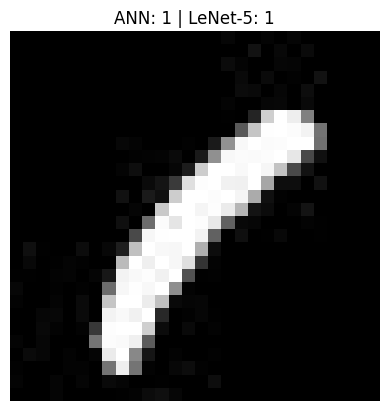

In [92]:
from tensorflow.keras.preprocessing import image

img_path = '/content/img_95.jpg'  # your test image path
img = image.load_img(img_path, color_mode='grayscale', target_size=(28, 28))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # make it (1,28,28,1)

# Predict using both models
ann_pred = np.argmax(ann.predict(img_array), axis=1)[0]
lenet_pred = np.argmax(lenet.predict(img_array), axis=1)[0]

print(f"ANN Prediction: {ann_pred}")
print(f"LeNet-5 Prediction: {lenet_pred}")

plt.imshow(img_array[0].reshape(28,28), cmap='gray')
plt.title(f"ANN: {ann_pred} | LeNet-5: {lenet_pred}")
plt.axis('off')
plt.show()